In [518]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

dataset_name = 'ytc'
all_files = glob.glob(os.path.join("../exp", dataset_name, "results_comparison_*.csv"))
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
#df = pd.read_csv('results.csv')}

In [519]:
df_accuracy = df.groupby(['methd', 'tau']).correct.mean().reset_index(drop=False)
df_payload = df.groupby(['tau']).payload_size.mean().reset_index(drop=False)

In [520]:
import numpy as np
df_pivot = pd.pivot_table(df, values="correct", index="tau", columns="methd", aggfunc=np.mean)
df_pivot.T

tau,0.0,5.5
methd,,
CNT,0.783333,0.825000
COS,0.991667,0.950000
WNG,1.000000,0.991667
WNG+COS,1.000000,0.975000


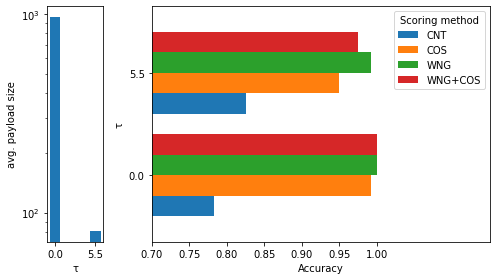

In [521]:
fig, (ax2, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 6]})
fig.set_figwidth(7)
df_pivot.plot.barh(ax=ax1, width=0.8) #(kind="bar")
#fig.set_size_inches(7, 6)
ax1.set_xlabel("Accuracy")
ax1.set_xlim((0.7, 1.15))
ax1.set_ylabel("τ")
ax1.set_xticks([0.70, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
ax1.legend(title='Scoring method')

ax2.bar(df_payload.tau, df_payload.payload_size, tick_label=df_payload.tau, width=1.5)
ax2.set_yscale('log')
ax2.set_xlabel('τ')
ax2.set_ylabel('avg. payload size')

fig.tight_layout()

# Use this to show the plot in a new window
plt.savefig(dataset_name + '_results_comparison.pdf')
plt.show()


In [522]:
import numpy as np
df_pivot2 = pd.pivot_table(df, values="payload_size", index="tau", columns="methd", aggfunc=np.mean)
df_pivot2.T

tau,0.0,5.5
methd,,
CNT,964.308333,80.741667
COS,964.308333,80.741667
WNG,964.308333,80.741667
WNG+COS,964.308333,80.741667


In [523]:
vl = 100 * (1 - (df_pivot2.iloc[1]['COS'] / df_pivot2.iloc[0]['COS']))
print("Payload size reduced to %s percent" % round(vl, 2))

Payload size reduced to 91.63 percent
